<a href="https://colab.research.google.com/github/wertrew21/programming-practice/blob/DLfS/Deep_Learning_from_Scratch_S4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 신경망 학습

## 4.2. 손실 함수 loss function
**신경망 학습**에서 최적의 매개변수 값을 탐색할 때 사용하는 **지표**.

### 4.2.1. 오차제곱합 SSE: Sum of Squares for Error
가장 많이 쓰이는 손실 함수.

In [ ]:
import numpy as np

# E = 0.5 * sum_k{(y_k - t_k)^2}    <-- The smaller E is, the better.
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# correct answer for label = 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# when estimating '2' has highest possibility
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

# when estimating '7' has highest possibility
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 4.2.2. 교차 엔트로피 오차 CEE: cross entropy error

In [ ]:
# E = -sum_k{t_k * log(y_k)}    <-- the output of correct answer determines the entire value E
def cross_entropy_error(y, k):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))   # each log value doesn't go infinite by adding delta

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3. 미니배치 학습 mini-batch training
데이터가 많을 경우 데이터 일부만을 추려 전체의 '근사치'로 이용하는 방법.

In [ ]:
import sys, os
sys.path.append("/content/drive/MyDrive/coding/DLfS")
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)   # pick [batch_size] random numbers
                                                        # under [train_size]
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## 4.3 수치 미분 numerical differenciation

### 4.3.1 미분

In [ ]:
# 수치 미분의 구현: 중심(중앙) 차분

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [ ]:
# An example for a function, the numerical differenciation, and the tangent line 
def function_1(x):
    return 0.01*x**2 + 0.1*x

def tangent_line(f, a, x):
    return numerical_diff(f, a)*(x-a) + f(a)

print(numerical_diff(function_1, 0))

0.1


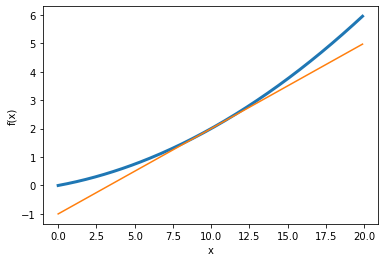

In [24]:
# plotting function and the numerical differenciation
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y1 = function_1(x)
y2 = tangent_line(function_1, 10, x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y1, lw = 3)
plt.plot(x, y2)
plt.show()

### 4.3.3 편미분 partial derivative

In [25]:
def function_2(x):   ## f(x0, x1) = x0^2 + x1^2
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

In [67]:
# partial derivative of function_2 with respect to x0 when x0 = 3, x1 = 4
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.0

# partial derivative of function_2 with respect to x1 when x0 = 3, x1 = 4
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp1, 3.0))
print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


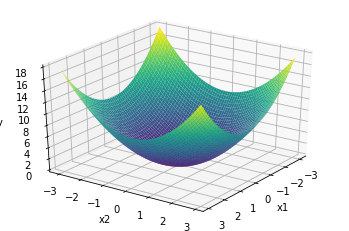

In [65]:
import numpy as np
import matplotlib.pylab as plot
from mpl_toolkits import mplot3d

def function_2_for_plt(x1, x2):
    return x1**2 + x2**2

x1 = np.arange(-3.0, 3.0, 0.1)
x2 = np.arange(-3.0, 3.0, 0.1)

X1, X2 = np.meshgrid(x1, x2)
Y = function_2_for_plt(X1, X2)

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X1, X2, Y, 50)
#ax.plot_wireframe(X1, X2, Y, color='black')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 35)

## 4.4 기울기 gradient

In [72]:
# gradient
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h   # x[idx]에 대한 편미분을 구하는 과정. -> x[idx] + dx
        fxh1 = f(x)            # 나머지 x값에 대해서는 변경시키지 않는다.
        
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

### 4.4.1 경사하강법 gradient descent method
현 위치에서 기울어진 방향으로 일정 거리만큼 이동하기를 반복하면서 함수의 값을 점차 줄이는 방법.

In [73]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):   # lr = learning rate
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [74]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [76]:
f, init_x, lr, step_num = function_2, np.array([-3.0, 4.0]), 0.01, 100
a = []
x = init_x
for i in range(step_num):

    grad = numerical_gradient(f, x)
    x -= lr * grad
    if i%5 ==0:
        a.append(x)

print(a)

[array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822]), array([-0.39785867,  0.53047822])]


ValueError: ignored

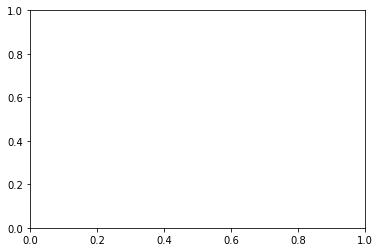

In [75]:
import matplotlib.pylab as plt
x1 = np.arange(-3.0, 3.0, 0.1)
x2 = np.arange(-3.0, 3.0, 0.1)
x = np.array([x1, x2])
y = function_2(x)
plt.plot(x, y)
plt.show()